### Goal: Classify flowers into species using petal/sepal measurements.
##### Algorithm: K-Nearest Neighbors
Steps:
Load the Iris dataset.
Train K-NN with different values of k (try 1, 3, 5,Plot accuracy vs. k to see how it changes.
Compare performance with logistic regression.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:

iris = load_iris(as_frame=True)  
df = iris.frame  
print('Shape:', df.shape)
display(df.head())
print('\nTarget distribution:')
print(df['target'].value_counts())

Shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Target distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [30]:
X, y = iris.data, iris.target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

k_values = [1, 3, 5, 7]
accuracies = []

In [32]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} → Accuracy: {acc:.3f}")


K=1 → Accuracy: 0.933
K=3 → Accuracy: 0.956
K=5 → Accuracy: 0.978
K=7 → Accuracy: 0.956


In [39]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



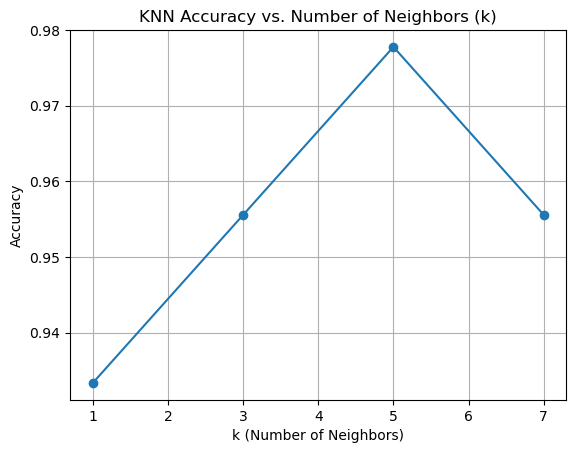

In [33]:
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN Accuracy vs. Number of Neighbors (k)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

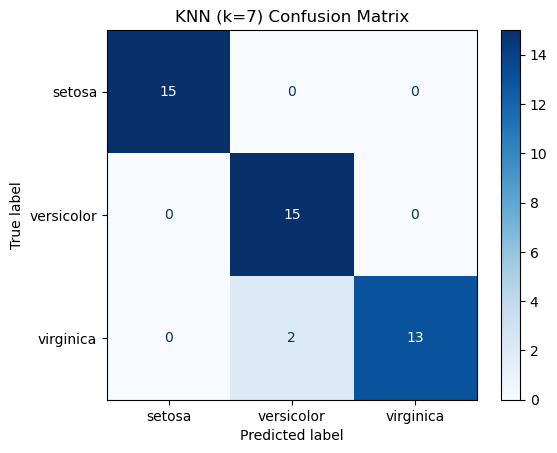

In [34]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title(f"KNN (k={k}) Confusion Matrix")
plt.show()


In [43]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression → Accuracy: {lr_acc:.3f}")

Logistic Regression → Accuracy: 0.933


In [36]:
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr, target_names=iris.target_names))


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



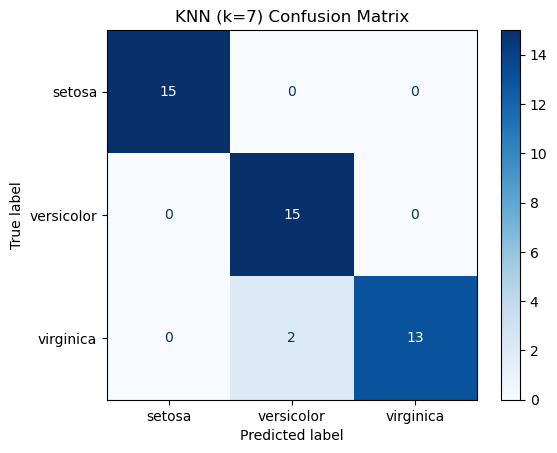

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title(f"KNN (k={k}) Confusion Matrix")
plt.show()